In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

In [14]:
df = pd.read_excel(u'../data/涨价.xlsx', index_col=0)
df = df.dropna()
df.index = pd.to_datetime(df.index)
cpi = pd.read_excel('../data/CPI.xls')
cpi = cpi[cpi.index >= '2010-01-01']
df = df[df.index >= '2010-01-01']

In [15]:
# df['mean'] = df['value'].rolling(window=30, min_periods=1).mean()
# df['mean'].plot(figsize=(16, 9))

In [16]:
mdf = df.resample('M').mean()

In [17]:
# mdf = mdf[(mdf.index >= '2013-01-01') & (mdf.index <= '2015-01-01')]
# cpi = cpi[(cpi.index >= '2013-01-01') & (cpi.index <= '2015-01-01')]

In [24]:
x = mdf['value'].rolling(window=2, min_periods=1).mean()
# x = x.rolling(window=12, min_periods=1).apply(lambda x: (x[-1] - x.mean()) / x.std())
x = (x - x.mean()) / x.std()
y = cpi['CPI']

In [39]:
x = x[x.index >= '2015-01-01']
y = y[y.index >= '2015-01-01']

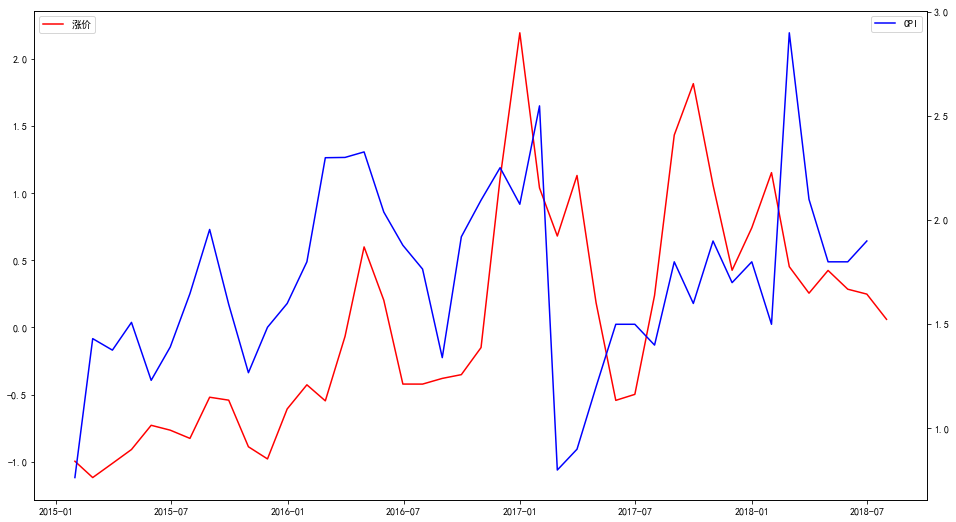

In [40]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x.index, x, color='red', label=u'涨价')
# ax.bar(df.index, df['mean'], color='red', width=3, label=u'词频')
ax.legend(loc='upper left')

ax1 = ax.twinx()
ax1.plot(y.index, y, color='blue', label='CPI')
# ax1.plot(cpi.index, cpi['PPI'], color='green', label='PPI')
ax1.legend()

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:-1], y)

In [45]:
line = slope * x + intercept
print slope, intercept

0.155875747861 1.70688975214


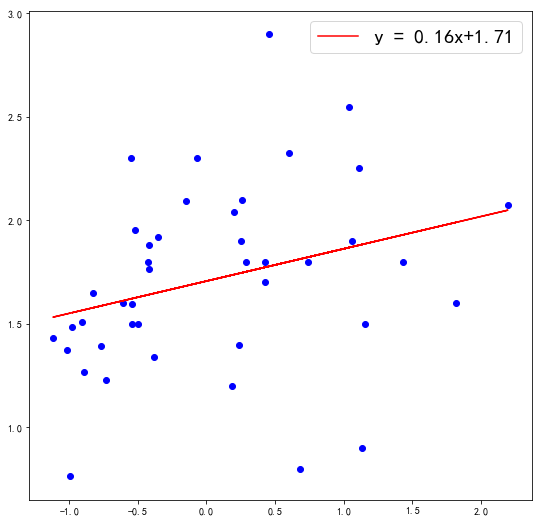

In [55]:
plt.figure(figsize=(9, 9))
plt.scatter(x[:-1], cpi['CPI'], color='blue', label='')
plt.plot(x, line, 'red', label='y = %.2fx+%.2f'%(slope, intercept))
plt.legend(fontsize=20)

In [52]:
x[-1] * slope + intercept

1.7163382329174099